# Refinitiv Academic Article Series:
# Economics and Finance 101:
# Computing Risk Free Rates and Excess Returns ($r_f$) Part 2: From Sovereign Coupon-Paying-Bonds (and Bootstrapping / Spot Rates)

Our [previous article](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds) explained what *Net Present Values*, *Face Values*, *Maturities*, *Coupons*, and *risk-free rates* are, how to compute them, and how they are used to calculate *excess returns* using only [Zero-Coupon Bonds](https://www.investopedia.com/terms/z/zero-couponbond.asp); in this article, we look at Coupon Paying Bonds, particularly *Cash Flow* incurred by Coupons, *Bootstrapping* and particularities about *Sovereign Bond* data. Very little is changed in this article until the '[Coupon Paying Rate](#CouponPayingRate)' section. It is aimed at academics from undergraduate level up, and thus will explain all mathematical notations to ensure that there is no confusion and so that anyone - no matter their expertise on the subject - can follow.

One may find many uses for the methods outlined below. For example: To calculate metrics such as the [Sharpe-Ratio](https://www.investopedia.com/terms/s/sharperatio.asp), one needs first to calculate *excess returns*, that then necessitates the calculation of *risk-free rates of return*.

## Use of Government Bonds in calculating risk-free rates <a class="anchor" id="UseofGovernmentBondsincalculatingriskfreerates"></a>

As afformentioned in our [previous article](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds), only certain banks have access to the primary sovereign bond markets where they may purchase Domestic Sovereign/Government Bonds. There are many such types of bonds. Among others, there are:


- United States (US): US Treasury securities are issued by the US Department of the Treasury and backed by the US government.
    - Fixed principal: A principal is the amount due on a debt. In the case of bonds, it is often referred to as the Face Value. The Face Value of all US Treasury securities is 1000 US Dollars (USD)
        - Treasury‐bills (as known as (a.k.a.): T-bills) have a maturity of less than a year (< 1 yr). These are bonds that do not pay coupons (**Zero-Coupon Bonds**).
        - Treasury‐notes (a.k.a.: T‐notes) have a maturity between 1 and 10 years (1‐10 yrs).
        - Treasury-bonds (a.k.a.: T‐bonds)  have a maturity between 10 and 30 years (10‐30 yrs). It is confusing calling a sub-set of bonds 'T-bonds', but that is their naming conventions. To avoid confusion, I will always refer to them explicitly as Treasury-bonds (or T‐bonds), not just bonds.
    - Inflation‐indexed: TIPS
    - Treasury STRIPS (created by private sector, not the US government)


- United Kingdom: Since1998, gilts have been issued by the UK Debt Management Office (DMO), an executive agency of the HMT (Her Majesty's  Treasury).
    - Conventional gilts: Short (< 5 yrs), medium (5‐15 yrs), long (> 15 yrs)
    - Inflation‐indexed gilts


- Japan
    - Medium term (2, 3, 4 yrs), long term (10 yrs), super long term (15, 20 yrs)


- Eurozone government bonds


There are several ways to compute risk-free rates based on bonds. In this article, we will focus on T-bills, as US Sovereign Bonds are often deemed the safest (which is a reason why the USD is named the [world's reserve currency](https://www.investopedia.com/articles/forex-currencies/092316/how-us-dollar-became-worlds-reserve-currency.asp#:~:text=Standing%20on%20Its%20Own%20as,accumulated%20reserves%20of%20U.S.%20dollars.)) and T-bills are an example of Zero-Coupon Bonds (as per [the method outlined by the Business Research Plus](https://bizlib247.wordpress.com/2013/01/18/risk-free-rate-and-fama-french-factors/)). From there, a risk-free rate of return can be computed as **[implied by its bond's Yield To Maturity](#1)** and **[based the change in the same bond's market price from  one day to the next](#2)**.

$$ \\ $$
## YTM implied daily risk-free rate <a class="anchor" id="1"></a>

### US Treasury Securities: Generalised <a class="anchor" id="USTreasurySecuritiesGeneralised"></a>

A bond is a debt; a debt with the promise to pay a [Face Value](https://www.investopedia.com/terms/f/facevalue.asp) ($FV$) in $m$ years (m for maturity) in the future as well as [Coupons](https://www.investopedia.com/terms/c/coupon.asp) (summing to $C$ every year) for an amount today. That latter amount paid for the bond may be fair; a fair value at time of the Bond's issue ($t$) is calculated as its [Net Present Value](https://www.investopedia.com/terms/n/npv.asp) ($NPV$) such that:

$$ NPV_{f_{\text{acf}}, t} = 
    \begin{Bmatrix}
         \frac{FV_t}{\left(1 + f_{\text{acf}} \text{ } YTM_t\right)^\frac{m}{f_{\text{acf}}}} + \sum^{^\frac{m}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C}{ (1 + f_{\text{acf}} \text{ } YTM_t)^{\tau} }} & \text{if } m \geq f_{\text{acf}} \\
         \\
         \frac{FV_t + m \text{ } C}{\left(1 + \text{ } m \text{ } YTM_t\right)} & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$$

where $YTM$ is the annualised [Yield To Maturity](https://www.investopedia.com/terms/y/yieldtomaturity.asp) of the Bond in question and $f_{\text{acf}}$ is the annual [compound](https://www.investopedia.com/terms/c/compounding.asp#:~:text=Compounding%20is%20the%20process%20whereby,called%20%22miracle%20of%20compounding.%22) frequency (such that if we compound cash flows annually, $f_{\text{acf}} = 1$; and if we compound cash flows bi-annually (*i.e.*: twice a year / every 6 months), $f_{\text{acf}} = 0.5$).

#### Annual Coupon Payment Frequency <a class="anchor" id="AnnualCouponPaymentFrequency"></a>
Coupons are paid at a fixed 'annual Coupon payment frequency' ($f_{ac \mathbf{p} f}$). Usually, the following are true:
- $f_{ac \mathbf{p} f} = 0.5$, *i.e.*: Coupon payments are made every 6 months (*i.e.*: semi-annually)
- $f_{\text{acf}}$ is set to the $f_{ac \mathbf{p} f}$ such that $f_{ac \mathbf{p} f} = f_{ac \mathbf{p} f}$
- Thus $f_{acf} = f_{ac \mathbf{p} f} = 0.5$.

#### Sub-Annual Interpolation of YTMs <a class="anchor" id="SubAnnualInterpolationofYTMs"></a>
Note that when using YTM values inter-year (*e.g.*: after 6 month), we then use a fraction of it, i.e.: $f_{\text{acf}} \text{ } YTM$. This is because all YTM values are annualised and - in accounting standards - *sub-annual* interpolation of YTMs are always [linear/arithmetic](https://en.wikipedia.org/wiki/Linear_interpolation#:~:text=In%20mathematics%2C%20linear%20interpolation%20is,set%20of%20known%20data%20points.). It must be remembered - however - that *super-annual* (*i.e.*: more than a year) extrapolation of YTMs are not nessesarily linear/arithmetic.

#### Compounding <a class="anchor" id="Compounding"></a>


It follows from the above that if $f_{\text{acf}} = 1$ such that we use an anually compounding accounting method, *annual* extrapolation of YTMs are [geometric](https://www.investopedia.com/articles/investing/071113/breaking-down-geometric-mean.asp).


Since Coupons are most often paid bi-annually, it **is common standard to compound cashflows bi-annually** too when they involve Bonds - [as aformentioned](#AnnualCouponPaymentFrequency). This is done to model a Bond-holding-[agent](https://en.wikipedia.org/wiki/Agent_(economics)) who re-invests Coupon payments as soon as they're received. In this senario, $f_{acf} = f_{ac \mathbf{p} f} = 0.5$.

#### Discount Factor <a class="anchor" id="DiscountFactor"></a>
It is easy to see that NPVs and YTMs are therefore (inversely) related; if one changes, the other must change too. We may - therefore - equivalently speak about a change in NPV and a change in YTM since the FV (for each sovereign bond [issuer](https://www.investopedia.com/terms/i/issuer.asp)) does not change. The YTM acts as the [discount factor](https://www.investopedia.com/terms/d/discountrate.asp) here; as a matter of fact, we can see that the YTM is the annual growth rate of our NPV that leads it to the FV in the following:

$$ FV_t  = 
    \begin{Bmatrix}
         \left[ NPV_{f_{\text{acf}}, t} - \sum^{^\frac{m}{f_{acf}}}_{\tau=1} {\frac{f_{acf} \text{ } C}{ (1 + f_{\text{acf}} \text{ } YTM_t)^{\tau} }} \right] \text{ } \left(1 + f_{\text{acf}} \text{ } YTM_t\right)^\frac{m}{f_{\text{acf}}} & \text{if } m \geq f_{\text{acf}} \\
         \\
         NPV_{f_{\text{acf}}, t} \text{ } {\left(1 + \text{ } m \text{ } YTM_t\right)} - m \text{ } C & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$$

#### Comparability

NPVs of different bonds are not comparable. That is because they account for bonds maturing at different times. Instead, YTMs of different bonds are comparable because they are annualised, therefore they account for different maturities. It is thus preferable to only speak of changes in sovereign bond NPVs in terms of the change in their YTMs; then we can compare them to each other, *e.g.*: in a Yield Curve (that can be seen [here](https://emea1.apps.cp.thomsonreuters.com/web/Explorer/EVzCURVEzFIxOV.aspx?s=0%23USBMK%3D&st=RIC) with Refinitiv credentials):

<img src="/content/dam/devportal/articles/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds/yieldcurve.PNG">

#### A Note on Maturities
It happens to be that we can easily formulate NPV (and FV) in the two cases where $m \geq 1$ and $m < 1$  because all maturities greater than 1 are a multiple of 1 (*i.e.*: they are whole numbers) (*i.e.*: no maturities past 1 year stop mid year, *e.g.*: 10 years and 6 months).

#### Coupon Paying Rate <a class="anchor" id="CouponPayingRate"></a>

If the Coupon is stated as an annual percentage, $\mathcal{C}_p$, of the Face Value (as it usually is), then:

$$ C = \mathcal{C}_p \text{   } \text{   } FV$$

### T-Note Example: Five Year T-Note with Semi-Annual Compounding

Using a semi-annual compounding accounting method (such that $f_{\text{acf}} = 0.5 = f_{\text{acpf}}$), a T-Note that matures in 5 Years (Five-Year T-Bill, FYTN) has a Net Present Value (${NPV}_{\text{FYTN}, f_{\text{acf}}, t}$) of ${NPV}_{\text{FYTN}, 0.5, t}$ at time t such that:

$$  \begin{array}{ll}
{NPV}_{\text{FYTN}, 0.5, t} &= 
    \begin{Bmatrix}
         \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^\frac{m_{\text{FYTN}}}{0.5}} + \sum^{^\frac{m_{\text{FYTN}}}{0.5}}_{\tau=1} {\frac{0.5 \text{ } C_{\text{FYTN}}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{if } m_{\text{FYTN}} \geq 0.5 \\
         \\
         \frac{FV_{\text{FYTN}, t} + m_{\text{FYTN}} \text{ } C_{\text{FYTN}} }{\left(1 + \text{ } m_{\text{FYTN}} \text{ } YTM_{\text{FYTN}, t}\right)} & \text{if } m_{\text{FYTN}} < 0.5
     \end{Bmatrix}\\
     \\
&= \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^\frac{5}{0.5}} + \sum^{^\frac{5}{0.5}}_{\tau=1} {\frac{0.5 \text{ } C_{\text{FYTN}}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } m_{\text{FYTN}} = 5 > 0.5 \\
&= \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } C_{\text{FYTN}}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } \frac{5}{0.5} = 10 \\
&= \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, t}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } C_{\text{FYTN}} = \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, t} \\
% &= \frac{1000 \text{U.S.D.}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } 1000 \text{U.S.D.}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } FV_{\text{FYTN}, t} = 1000 \text{U.S.D.} \\
\end{array}$$


Let's have a look at data from "2020-07-31":

In [1]:
# We need to gather our data. Since Refinitiv's DataStream Web Services (DSWS) allows for access to the most accurate and wholesome end-of-day (E.O.D.) economic database (DB), naturally it is more than appropriate. We can access DSWS via the Python library "DatastreamDSWS" that can be installed simply by using  pip install .
import DatastreamDSWS as DSWS

# We can use our Refinitiv's Datastream Web Socket (DSWS) API keys that allows us to be identified by Refinitiv's back-end services and enables us to request (and fetch) data:
DSWS_username = open("Datastream_username.txt", "r")  # The username is placed in a text file so that it may be used in this code without showing it itself
DSWS_password = open("Datastream_password.txt", "r")  # Same for the password
ds = DSWS.Datastream(username=str(DSWS_username.read()),
                     password=str(DSWS_password.read()))

# It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:
DSWS_username.close()
DSWS_password.close()

In [2]:
# Now let's get US Treasury Note (Maturing) 31/07/25:
fytn_Coupon_2020_07_31_p = ds.get_data( #  the ' _p ' is for 'price'
    tickers='613XGU', # found this ticker on https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+Note+31%2F07%2F25&prev=99_US+Treasury+Note+(Maturing)+31%2F07%2F25&nav_category=13
    fields="X", freq='D')

In [3]:
fytn_Coupon_2020_07_31_p.dropna()

Instrument,613XGU
Field,X
Dates,
2020-07-24,99.8594
2020-07-27,99.7969
2020-07-28,99.9219
2020-07-29,99.9765
2020-07-30,100.1016
...,...
2021-07-13,98.2500
2021-07-14,98.4297


In [4]:
fytn_Coupon_2020_07_31_p.loc["2020-07-30"]

Instrument  Field
613XGU      X        100.1016
Name: 2020-07-30, dtype: float64

We can see that the price on "2020-07-31" was \$100.1016, so it was selling at a premium. We are using '[613XGU](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=613XGU&prev=99_TRUS5YT&prev_csrc=8)' instead of '[TRUS5YT](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=TRUS5YT&prev=99_)' as the latter is the YTM given for sovereign provided bonds which one cannot actually buy - only investment banks can purchse such bonds. (Many pension funds and asset managers hold sovereign bonds, but investment banks are the institutions who trade them.) Here instead we are looking at sovereign bonds sold by the investment bank 'Deutsche Boerse AG'. This means that, in our equation, we'd use the realised price of \\$100.1016 instead of the ${NPV}_{\text{FYTN}, 0.5, "2020-07-31"}$.

In [5]:
# Now let's get US Treasury Note (Maturing) 31/07/25:
fytn_Coupon_2020_07_31_f = ds.get_data(  #  the ' _f ' is for 'fixed', as in fixed data.
    tickers='613XGU',  # found this ticker on https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+Note+31%2F07%2F25&prev=99_US+Treasury+Note+(Maturing)+31%2F07%2F25&nav_category=13
    kind=0,  # ' kind=0 ' is needed here as we are looking for static data that doesn't change with time.
    fields=["NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL", "EXCHB"])
fytn_Coupon_2020_07_31_f

,Instrument,Datatype,Value,Dates
0,613XGU,NAME,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2021-07-19
1,613XGU,ID,2020-07-31,2021-07-19
2,613XGU,TERM,5,2021-07-19
3,613XGU,RV,100,2021-07-19
4,613XGU,C,0.25,2021-07-19
5,613XGU,CTYP,FIX,2021-07-19
6,613XGU,RDL,2025-07-31,2021-07-19
7,613XGU,EXCHB,FF MU DD,2021-07-19


From the above we can note that the Issuing Date (```ID```) is 2020-07-31 with a maturity (also known as (a.k.a.) ```Term```) of 5 years, thus a Last Redemption Date (```RDL```) of 2025-07-31, a Face Value (a.k.a. "Redemption Value" - ```RV```) of \\$100, and a Fixed Coupon Rate of 0.25\% - which is quite low. (We can also see the exchanges where our security was listed, shown as [Codes](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&dt=true&q=exchange&prev=dtx1%7C0001_0001_0001&subset=dtx1%7C0001_0001_0001).) It is unusual to have T‐notes with Face Values other than \\$1000, but this is hat we're dealing with here. We thus now have:

$$  \begin{array}{ll}
\text{\$}100.1016 &= \frac{FV_{\text{FYTN}, "2020-07-31"}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, "2020-07-31"}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} & \text{since we are using our realised price of \$100.1016 instead of the } {NPV}_{\text{FYTN}, 0.5, "2020-07-31"}\\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } \text{\$}100}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} & \text{since } FV_{\text{FYTN}, "2020-07-31"} = \text{\$}100 \\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 * \frac{0.25}{100} * \text{   } \text{   } \text{\$}100}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} & \text{since } \mathcal{C}_p = 0.25\% = \frac{0.25}{100} \text{ in this instance} \\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{\text{\$}0.125}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} \\
\end{array}$$
since

In [6]:
0.5 * (0.25/100) * 100

0.125

Thus:

$$ \begin{array}{ll}
0 &= \frac{FV_{\text{FYTN}, "2020-07-31"}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, "2020-07-31"}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} - \text{\$}100.1016 & \text{ as per the above} \\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{\text{\$}0.125}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} - \text{\$}100.1016 & \text{ as per the above} \\
&\approx \frac{\text{\$}100}{\left(1 + 0.5 \text{   } * \text{   }  0.002295515059055049 \right)^{10}} + \sum^{10}_{\tau=1} {\frac{\text{\$}0.125}{ (1 + 0.5 \text{   } * \text{   }  0.002295515059055049)^{\tau} }} - \text{\$}100.1016 
\end{array}$$

as computed itteratively with the Python funcition ```YTM_Solver``` deffined bellow:

#### Computing Single YTM Values

In [7]:
from scipy import optimize # ' scipy ' is a scientific Python library. We will use it to find the optimal Yield in our non-closed equation.


def YTM_Solver(fv, c, m, p, f_acf, error=False):
    """YTM_Solver(fv, c, m, p, f_acf, error=False) Version 1.0
    This Python function calculates the yield to maturity for a sovereign bond, wether coupon paying or not.

    Dependencies
    ----------

    Python sub-library 'optimised' from 'scipy' version 1.6.2. Imported via following line:
    >>> from scipy import optimize

    Parameters
    ----------

    fv: int or float
        Face Value (also known as (a.k.a.) Redemption Value) of the bond.
        This has to be in the same currency as c and p.

    c: int or float
        Coupon that the bond pays every year - if any.
        This has to be in the same currency as fv and p.
        If the Bond doesn't pay Coupons, set it to 'None'.

    m: int or float
        Maturity (a.k.a.: Term) of the Bond in years - if any.
        If it is less than a year, express it in a fraction (e.g.: 6 months as 1/2).

    p: int or float
        Realised price of the Bond.
        This has to be in the same currency as fv and c.

    f_acf: int or float
          Annual compound frequency (such that if we compound cash flows annually, f_acf=1; and if we compound cash flows bi-annually (i.e.: twice a year / every 6 months), f_acf=0.5).
          Coupons are paid at a fixed 'annual Coupon payment frequency' (f_acPf). Usually, the following are true:
          - f_acPf = 0.5 , i.e.: Coupon payments are made every 6 months (i.e.: semi-annually)
          - f_acf is set to the f_acPf such that f_acPf = f_acf
          - Thus usually f_acPf = f_acpf = 0.5.

    error: boolean
        If set to True and if the method used to compute the ytm is not infenitely precise (id est: if m > f_acf), then an error value away from the price of the bond is provided.

    Returns
    -------

    if the 'error' parameter is:
        - Set to False: YTM_Solver returns a float as the ytm.
        - Set to True: YTM_Solver returns a tuple of the ytm and the error. This is the eror in the price implied by the given ytm.
    """

    if m >= f_acf:  # Net Preset Values (NPVs) - and by extension Yields - of Bonds are valued with equations that depend on the relative value of their maturities and annual compound frequency.

        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            return (fv/((1 + (f_acf*ytm))**(m/f_acf))) - p + sum(
                [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)])

        ytm_op = optimize.newton(  # the ' _op ' here stands for 'optimal'
            func=YTM_Equation,
            x0=0.002,  # I simply chose ' 0.002 ' after 3 trial and improvement rounds.
            args=(fv, c, m, p, f_acf))  # These stand for (respectively): fv, c, m, p and f_acf.

        err = (fv/((1 + (f_acf*ytm_op))**(m/f_acf))) - p + sum(
                [(f_acf*c)/((1 + f_acf*ytm_op)**i) for i in range(1, int(m/f_acf)+1)]) # YTM_Equation(ytm_op, fv, c, m, p, f_acf)

    elif m < f_acf:
        ytm_op = (((fv + (m*c))/p)-1)/m
        err = 0

    else:
        return "fv, c, m, p and f_acf must be numbers - either integers or floating point."


    if error is False:
        return ytm_op
    elif error is True:
        return ytm_op, err
    else:
        print("Parameter 'error' needs to be a boolean value of 'True' or 'False'.")

In [8]:
ytm_op, err = YTM_Solver(fv=100, c=0.25, m=5, p=100.1016, f_acf=0.5, error=True)
print(f"Our optimal YTM is {ytm_op} with an error of {err}")

Our optimal YTM is 0.002295515059055049 with an error of 1.2434497875801753e-14


In [9]:
# Checking the error manually to verify sound mathematics in the ' CPB_YTM_Solver ' function:
(100/((1+(0.5*ytm_op))**10)) - 100.1016 + (sum(
    [0.125/((1 + (0.5 * ytm_op))**i) for i in range(1, 11)]))

1.2434497875801753e-14

#### Computing Series of YTM Values

We cannot use the same price data from ```fytn_Coupon_2020_07_31_p``` through time along with the ```YTM_Solver``` to construct a data-frame of ```ytm```s of interest. This is because the maturity technically is different every day, decreasing by a day every time-period/row. Instead, we need a new Bond with the same maturity per row of our series.

Using ```DS.SYMBOLLOOKUP(Category=Bonds & Convertibles)``` as a ```field``` of ```ds.get_data```, we can search for our Bonds of interest (*i.e.*: 5 year US Bonds) within any period of interest (*e.g.*: 2022 to 2027)

In [10]:
# There are some libraries we need to import:
import pandas  # pandas will be needed to manipulate data sets
from datetime import datetime
import calendar
print("The pandas library imported in this code is version: " + pandas.__version__)

The pandas library imported in this code is version: 1.2.4


In [11]:
def DSWS_fixed_data_collection(instruments,
                               fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]):
    dswsfdc_df = pandas.DataFrame()
    for i in instruments:
        _dswsfdc_df = ds.get_data(tickers=i, kind=0, fields=fields)
        dswsfdc_df = dswsfdc_df.append(pandas.DataFrame(
            data=list(_dswsfdc_df['Value'].values), index=fields).T)
    return dswsfdc_df

def DSWS_fixed_and_price_data_collection_and_ytm(instruments,
                                                 fields=["DSCD", "NAME", "ID",
                                                         "TERM", "RV", "C",
                                                         "CTYP", "RDL"]):
    _df = DSWS_fixed_data_collection(instruments=instruments, fields=fields)
    _df["Price at issue"] = [
    float(ds.get_data(start=_df.iloc[i]["ID"], end=_df.iloc[i]["ID"],
                      fields="X", freq='D',
                      tickers=_df.iloc[i]["DSCD"])["Value"].values[0])
    for i in range(len(_df))]

    # Add the YTM to our data-frame
    _df["YTM"] = [YTM_Solver(
        fv=_df.iloc[i]["RV"],
        c=_df.iloc[i]["RV"] * _df.iloc[i]["C"] / 100,
        m=_df.iloc[i]["TERM"],
        f_acf=0.5, error=False,
        p=_df.iloc[i]["Price at issue"])
                     for i in range(len(_df.index))]

    return _df

In [12]:
# Collect a list of all the relevent Datastream Instrument Codes:
list_of_instrument_dfs, list_of_instruments = [], []
for j in range(2022, 2027):  # range from year to year
    for i in range(1, 13):  # range from month to month
        monthrange = calendar.monthrange(j, i)  # This gives two numbers in a tuple, the start day of any month (always 1) and the last.
        search_term = 'US Treasury Note ' + str(j-5) + ' ' + str(  # Our search term is what we are going to look for; imagine we are using the Datastream Navigator and searching for that term. The ' -5 ' is here because we're looking at Bonds with 5 year terms.
            monthrange[1]) + '/' + '{:>02}'.format(i) + '/' + str(j)[2:]  # ' monthrange[1] ' is the last date of that month. Also, ' '{:>02}'.format(i) ' adds a leading '0' in front of single digits, which is needed in our search term.
        instrument = ds.get_data(  # This gets the lookup data from Datastream's Navigator's API via the ' DS.SYMBOLLOOKUP ' field.
            tickers=search_term, kind=0,
            fields=['DS.SYMBOLLOOKUP(Category=Bonds & Convertibles)'])
        list_of_instrument_dfs.append(instrument)
        if instrument["Value"][0] != "No matches":
            list_of_instruments.append(instrument["Instrument"].values[0])

# Collect original fixed data from DSWS:
ytm_df = DSWS_fixed_and_price_data_collection_and_ytm(instruments=list_of_instruments)

ytm_df

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,YTM
0,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,0.002091
0,616J44,US TREASURY NOTE 2020 1/4% 31/08/25 AC-2025,2020-08-31,5,100,0.25,FIX,2025-08-31,99.9063,0.002689
0,619AX8,US TREASURY NOTE 2020 1/4% 30/09/25 AD-2025,2020-09-30,5,100,0.25,FIX,2025-09-30,99.8594,0.002783
0,622HAG,US TREASURY NOTE 2020 1/4% 31/10/25 AF-2025,2020-10-31,5,100,0.25,FIX,2025-10-31,99.3359,0.003842
0,624Z3N,US TREASURY NOTE 2020 3/8% 30/11/25 AG-2025,2020-11-30,5,100,0.375,FIX,2025-11-30,100.0547,0.003640
0,628GF5,US TREASURY NOTE 2020 3/8% 31/12/25 AH-2025,2020-12-31,5,100,0.375,FIX,2025-12-31,100.0703,0.003608
0,6309UZ,US TREASURY NOTE 2021 3/8% 31/01/26 U-2026,2021-01-31,5,100,0.375,FIX,2026-01-31,99.7500,0.004256
0,634DPQ,US TREASURY NOTE 2021 1/2% 28/02/26 V-2026,2021-02-28,5,100,0.5,FIX,2026-02-28,98.8750,0.007295
0,637QZJ,US TREASURY NOTE 2021 3/4% 31/03/26 W-2026,2021-03-31,5,100,0.75,FIX,2026-03-31,99.0859,0.009376
0,6403CY,US TREASURY NOTE 2021 3/4% 30/04/26 Y-2026,2021-04-30,5,100,0.75,FIX,2026-04-30,99.5156,0.008492


##### Graph Series with [Plotly](https://plotly.com/)
We can graph such YTMs or prices simply with the following:

In [13]:
from datetime import date, timedelta
import statistics

# The below are needed to plot graphs of all kinds
import plotly
import plotly.express
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks
cufflinks.go_offline()
# cufflinks.set_config_file(offline = True, world_readable = True)

for i,j in zip(["plotly", "cufflinks"], [plotly, cufflinks]):
    print("The " + str(i) + " library imported in this code is version: " + j.__version__)

The plotly library imported in this code is version: 4.14.3
The cufflinks library imported in this code is version: 0.17.3


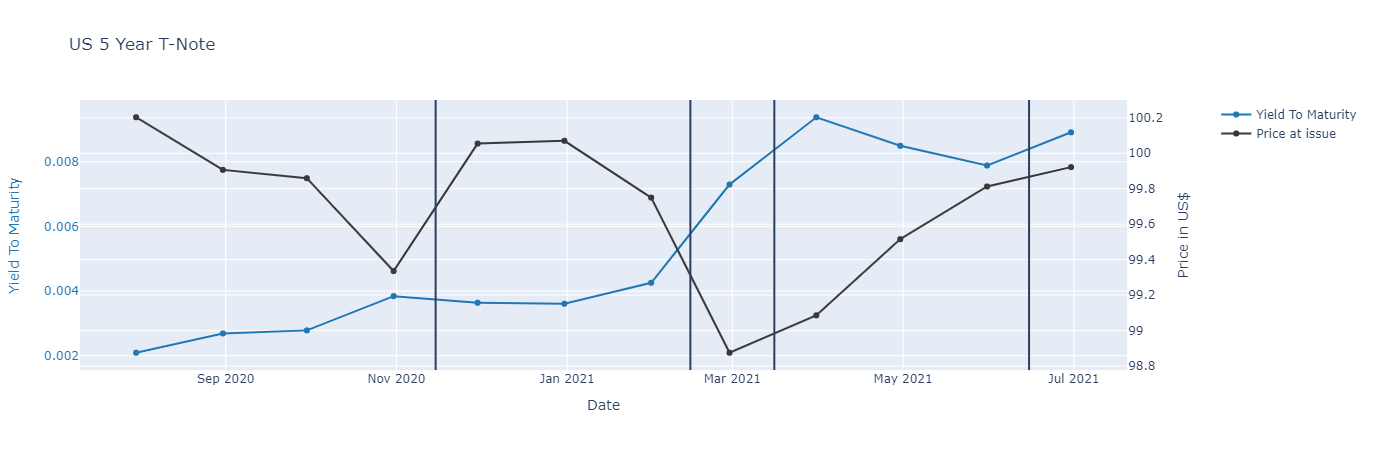

In [14]:
fig = make_subplots(specs=[[{"secondary_y": True}]])  # Create figure with secondary y-axis

# Create vertical lines when Coupon rates change
c_changed_date, shapes = [], []
for i in range(len(ytm_df)-1):
    if ytm_df.iloc[i]["C"] - ytm_df.iloc[i+1]["C"] != 0:
        sdate = datetime.strptime(ytm_df.iloc[i]["ID"], '%Y-%m-%d')
        edate = datetime.strptime(ytm_df.iloc[i+1]["ID"], '%Y-%m-%d')
        delta = edate - sdate
        inter_dates = [sdate + timedelta(days=i) for i in range(delta.days + 1)]
        c_changed_date.append(inter_dates[int(statistics.median(
            range(1, len(inter_dates))))].strftime('%Y-%m-%d'))
for i in c_changed_date:
    shapes.append({'type': 'line', 'xref': 'x', 'yref': 'paper',
                   'x0': i, 'y0': 0, 'x1': i, 'y1': 1})
fig.update_layout(shapes=shapes,)

# Add traces
fig.add_trace(go.Scatter(x=ytm_df["ID"], y=ytm_df["YTM"],
                         name="Yield To Maturity", line_color="#1f77b4"),
              secondary_y=False,)
fig.add_trace(go.Scatter(x=ytm_df["ID"], y=ytm_df["Price at issue"],
                         name="Price at issue", line_color="#383838"),
              secondary_y=True,)

# Set y-axes titles
fig.update_yaxes(title_text="Yield To Maturity", secondary_y=False)
fig.update_yaxes(title_text="Price in US$", secondary_y=True)

fig.update_layout(title_text="US 5 Year T-Note",
                  yaxis=dict(titlefont=dict(color="#1f77b4"),
                             tickfont=dict(color="#1f77b4")),)
fig.update_xaxes(title_text="Date")  # Set x-axis title

fig.show()

Interestingly here, we can see that YTM and prices don't always move inversly; that's because the Coupon rates are not constant throughout. I thus added vertical lines in-between the dates when Coupon rates change to ease comparisons. Also, we can note that when the price of the Bond goes above its FV (of \$100), the YTM does not go negative; that's because of the added revenue from Coupons. If we were looking at a non Coupon paying (i.e.: a Zero-Coupon) Bond, then its YTM would be negative when its price was higher than its FV. Often - as a matter of fact - we do extrapelate Zero-Coupon Equivalent YTMs, this way all YTMs are comparable to each other. This is called '[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(finance))'.

## Bootstrapping and Spot-Rates: Coupon-Paying Bond's Zero-Coupon Equivalent Yield To Maturity

Now, we are going to extrapolate the YTM of any coupon-paying Bond as though it did not pay coupons. To do so, we will need to compute [Spot-Rates](https://www.investopedia.com/terms/s/spot_rate.asp) for each period of interest ($f_{\text{acf}}$), then the Spot-Rate for the period of interest is our Zero-Coupon Equivalent Yield To Maturity ($YTM_{ZCE}$).

Computing $YTM_{ZCE}$ is only useful for Coupon-paying Bonds, so we're only looking at a Coupon-paying Bond. Then the Net Present Value of the Bond of interest at the time of issue is
$$
NPV_{{Bond}_t, f_{\text{acf}}} = 
    \begin{Bmatrix}
         \frac{FV_{Bond}}{\left(1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f_{\text{acf}}}} + \sum^{^\frac{m_{Bond}}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C_{{Bond}_t}}{ (1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{if } m_{Bond} \geq f_{\text{acf}} \\
         \\
         \frac{FV_{Bond} + m_{Bond} \text{ } C_{{Bond}_t}}{\left(1 + \text{ } m_{Bond} \text{ } {SR}_{{Bond}_t, T}\right)} & \text{if } m_{Bond} < f_{\text{acf}}
     \end{Bmatrix}
$$
where
* $T$ is the last time period of interest (it could be $m_{Bond}$ if each time period is a year long) (thus it's always the case that $T = \frac{m_{Bond}}{f_{\text{acf}}}$),
* $f_{\text{acf}}$ is the Annual Compounding Frequency in our accounting method used to calculate $NPV_{{Bond}_t, f_{\text{acf}}}$,
* $Bond$ is the Bond we're interested in, *e.g.*: $FYTN$ (Five Year Treasury-Note),
* $FV_{Bond}$ is the Face Value of the $Bond$ (usually \\$1000 or \\$100 when dealing with US sovereign Bonds),
* $m_{Bond}$ is the Maturity of the $Bond$ at time of issue, a.k.a. the Term of the Bond,
* ${Bond}_t$ is the Bond we're interested in specifically issued at time $t$, *e.g.*: $FYTN_{\text{"2020-01-31"}}$ (Five Year Treasury-Note issued on the 31st of January 2020),
* $ C_{{Bond}_t} = \mathcal{C}_{p,{Bond}_t} \text{ } * \text{ } FV_{Bond}$ where $\mathcal{C}_{p,{Bond}_t}$ is the Coupon rate of ${Bond}_t$ (usually expressed as a persentage (thus the '$p$' of $FV_{Bond}$),
* and ${SR}_{{Bond}_t, \mathtt{t}}$ is the Spot Rate for ${Bond}_t$ at time $\mathtt{t}$. Note that ${SR}_{{Bond}_t, \tau}$ above is in a summation itterating through $\tau$s, meaning that we are using a different ${SR}_{{Bond}_t, \tau}$ for each $\tau$ itteration.

then (with he example of US sovereign Bonds) we don't have to look into Bonds with matutities of 1 year or less (since they don't pay Coupons). Thus ${SR}_{{Bond}_t, \tau}$ for US sovereign Bonds for the 1st year is already known and can be found on [Datastream](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&prev=99_US+Treasury+Note+2021+31%2F01%2F26&nav_category=13). From these 1st few discoverable Spot Rates, (i) one can figure out the next Spot Rate (the 1st theoretical Spot Rate); (ii) then the 2nd theoretical Spot Rate can be calculated using the discoverable Spot Rates and the 1st theoretical Spot Rate, (iii) then the 3rd theoretical Spot Rate can be calculated using the discoverable Spot Rates and the first two theoretical Spot Rates, and so on till time period '$T$'. Doing so means that we have all ${SR}_{{Bond}_t, \mathtt{t}}$ where $\mathtt{t} > \mathtt{T}$ and $\mathtt{T}$ is the end of the time window investigated at any stage (i), (ii), ... Thus, at any one of these stages we can let $T = \mathtt{T}$; and remembering that $T = \frac{m_{Bond}}{f_{\text{acf}}}$, then:

$$ \begin{array}{ll}
NPV_{{Bond}_t, f_{\text{acf}}}
         &= \frac{FV_{Bond}}{\left(1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f_{\text{acf}}}} + \sum^{^\frac{m_{Bond}}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C_{{Bond}_t}}{ (1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{where } m_{Bond} \geq f_{\text{acf}} \\
         &= \frac{FV_{Bond}}{\left(1 + f \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f}} + \sum^{^{\frac{m_{Bond}}{f}}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{letting } f = f_{\text{acf}} = f_{ac \mathbf{p} f} = \text{fixed 'annual Coupon payment frequency'}\\
         &= \frac{FV_{Bond}}{\left(1 + f \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f}} + \frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, T})^{T} } + \sum^{^{\frac{m_{Bond}}{f}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{extracting the last summand} \\
         &= \frac{FV_{Bond}}{\left(1 + f \text{ } {SR}_{{Bond}_t, \mathtt{T}}\right)^\mathtt{T}} + \frac{f \text{ } C_{{Bond}_t}}{ \left(1 + f \text{ } {SR}_{{Bond}_t, \mathtt{T}}\right)^{\mathtt{T}} } + \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{since we let } T = \mathtt{T} \text{ and it is true that } T = \frac{m_{Bond}}{f_{\text{acf}}}\\
         &= \frac{FV_{Bond} + f \text{ } C_{{Bond}_t}}{\left(1 + f \text{ } {SR}_{{Bond}_t, \mathtt{T}}\right)^\mathtt{T}} + \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} \\
\end{array} $$

Let's add 'hats' to the unknown variables; here the only unknown variable is the last ${SR}_{{Bond}_t, \mathtt{t}}$ which is ${SR}_{{Bond}_t, \mathtt{T}}$, so it'll be written as $\widehat{{SR}_{{Bond}_t, \mathtt{T}}}$. Remember that this is because we have all ${SR}_{{Bond}_t, \mathtt{t}}$ where $\mathtt{t} > \mathtt{T}$ and $\mathtt{T}$ is the end of the time window investigated at any stage (i), (ii), ... defined above. Then:

$$ \begin{array}{ll}
NPV_{{Bond}_t, f}
         &= \frac{FV_{Bond} + f \text{ } C_{{Bond}_t}}{\left(1 + f \text{ } \widehat{{SR}_{{Bond}_t, \mathtt{T}}}\right)^\mathtt{T}} + \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} \\
\end{array} $$
then:
$$ \begin{array}{ll}
\widehat{{SR}_{{Bond}_t, \mathtt{T}}}
         &= \frac{
             \sqrt[\mathtt{T}]{\frac{FV_{Bond} + f \text{ } C_{{Bond}_t}}{{NPV}_{{Bond}_t, f} - \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }}}} - 1
             }{f}
\end{array} $$


Let's make a Python function to return this Spot Rate for any such stage:

In [15]:
def Spot_Rate_Last(f,fv,m,c,p,sr):
    """Spot_Rate_Last(f,fv,m,c,p,sr)
    This Python function returns the Zero-Coupon Equivalent rate of a coupon-paying Bond (otherwise known as the Spot-Rate) of one time period (defined as ' f ') after the last one in the list of provided (past) spot-rates (' sp ').

    Returns
    -------

    float: The last spot rate of a Bond for the period looked at.
    """
    discouted_coupon_payments = [(f*c)/((1 + f*j)**(i+1))  # ' +1 ' because 'enumerate' starts at 0
                                 for i, j in enumerate(sr)]
    last_sr = ((((fv + f*c)/(p - discouted_coupon_payments))**(f/m))-1)/f
    return last_sr

### T-Note Example: Five Year T-Note with Semi-Annual Compounding

#### On-the-run sovereign Bonds

Now we can repeat the above for different US T-Notes with simillar issue dates and different maturing dates. We collect all data-points in a Python dictionary ```container_container``` before tidying it in the ```yc_df``` pandas data-frame below. Remeber though, we've put ourselves in the shooes of an economic agent looking to invest in 'brand new' sovereign Bonds, in Bonds that our agent would buy on issue; such bonds are called [on-the-run sovereign Bonds](https://www.investopedia.com/terms/o/on-the-runtreasuries.asp).

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,YTM,CF
RDL,,,,,,,,,,,
2020-12-29,613V2R,UTD.STS OF AMERICA 2020 ZERO 29/12/20,2020-07-28,0.5,100,0,ZERO,2020-12-29,99.9469,0.001063,[100.0]
2022-07-31,613XGW,US TREASURY NOTE 2020 1/8% 31/07/22 BD-2022,2020-07-31,2,100,0.125,FIX,2022-07-31,100.0313,0.001093,"[0.125, 0.125, 0.125, 100.125]"
2025-07-31,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,0.002091,"[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2..."
2027-07-31,613XG1,US TREASURY NOTE 2020 3/8% 31/07/27 N-2027,2020-07-31,7,100,0.375,FIX,2027-07-31,99.9140,0.003875,"[0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3..."


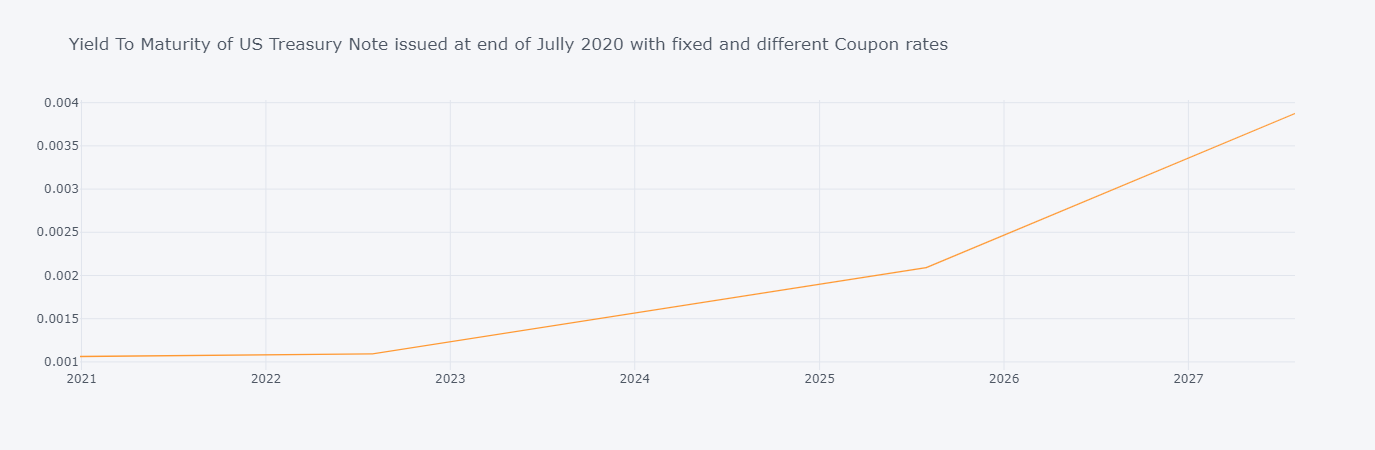

In [16]:
yc_df = DSWS_fixed_and_price_data_collection_and_ytm(
    instruments=["613V2R", "613XGW", "613XGU", "613XG1"],
    fields=["DSCD", "NAME", "ID", "TERM",
            "RV", "C", "CTYP", "RDL"])

# Add cash-flows to our data-frame
cf = []   # ' cf ' for cash flow.
for i in range(len(yc_df)):
    _c = yc_df.iloc[i]["RV"] * yc_df.iloc[i]["C"] / 100  # ' c ' for Coupon payment (in absolute terms).
    _cf = [_c for j in range(int(yc_df.iloc[i]["TERM"] / 0.5))]  # ' cf ' for cash flow.
    _cf[-1] = _cf[-1] + yc_df.iloc[i]["RV"]
    cf.append(_cf)
yc_df["CF"] = cf

yc_df.index = yc_df['RDL']

display(yc_df)
yc_df["YTM"].iplot(title="Yield To Maturity of US Treasury Note issued at end of Jully 2020 with fixed and different Coupon rates")

We can see that we have very little liquidity in such on-the-run sovereign Bonds. I couldn't find ones that our agent could buy at time of issue (towards the end of July 2020). Such a lack of liquidity does not provide us with enough datapoints to compute Spot Rates.

> ##### Example of how a lack in liquidity in on-the-run sovereign Bonds disables us from computing Spot Rates without using off-the-run sovereign Bonds' data
> We know from the ```yc_df``` data-frame above that we do not have data for on-the-run US Treasury Bonds issued towards the end of July 2020 with 1 year maturity. That's because such a specific Bond is not being sold on the market. Say that we try to compute the Spot Rate for such a specific Bond, we'd have to use the following data:
> 
> |Maturity (Years)|Coupon Rate|Price at issue|Yield To Maturity|
> |:-|:-|:-|:-|
> |0.50|0.000|99.9469|0.001063|
> |1.00| $\mathcal{C}_{p,\text{OYTB}_{"2020-07-31"}}$ |$P_{\text{OYTB}_{"2020-07-31"}}$|$YTM_{\text{OYTB}_{"2020-07-31"}}$|
>
> Where $P_{\text{OYTB}_{"2020-07-31"}}$ is the price of our fictisious One Year Treasury Bill issued on 2020-07-31. Then our cashflow is:
>
> |Time (years) from issue to cashflow date|Calculation of discouted cashflow|Discouted cashflow|
> |:-|:-|:-|
> |0.5|$\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}}$ x ${FV}_{\text{OYTB}}$ x $f_{\text{acpf}}$ = 0.000 x \$100 x 0.5|\$0.00|
> |1.0|$\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}}$ x ${FV}_{\text{OYTB}}$ x $f_{\text{acpf}} = 0.000$ x \\$100 x 0.5 + \$100|\$100|
> 
> since the Coupon rate of all US Bonds with maturities equal to or lower than 1 year are Zero-Coupon. Then
> 
> $$ \begin{array}{ll} {NPV}_{\text{OYTB}_{"2020-07-31"}, 0.5} &= \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}}}{1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 1}} + \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}} + {FV}_{\text{OYTB}_{"2020-07-31"}}}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \\ P_{\text{OYTB}_{"2020-07-31"}} &= \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}}}{1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 1}} + \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}} + {FV}_{\text{OYTB}_{"2020-07-31"}}}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \text{ letting } {NPV}_{\text{OYTB}_{"2020-07-31"}, 0.5} = P_{\text{OYTB}_{"2020-07-31"}} \\ &= \frac{0.000 \text{ x } \$100 \text{ x } 0.5}{1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 1}} + \frac{0.000 \text{ x } \$100 \text{ x } 0.5 + \$ 100}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \\ &= \frac{0.000 \text{ x } \$100 \text{ x } 0.5}{1 + {YTM}_{\text{SMTB}_{"2020-07-31"}}} + \frac{0.000 \text{ x } \$100 \text{ x } 0.5 + \$ 100}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \text{ letting } {SR}_{\text{OYTB}_{"2020-07-31"}, 1} = {YTM}_{\text{SMTB}_{"2020-07-31"}} = \text{ YTM of the Six Month Treasury Bill at time of its issue} \\ &= \frac{\$ 100}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \text{, thus} \\ {SR}_{\text{OYTB}_{"2020-07-31"}, 2} &= \sqrt[2]{\frac{\$ 100}{P_{\text{OYTB}_{"2020-07-31"}}}}-1 \end{array}$$
> 
> And thus, without a OYTB Bond from which to get $P_{\text{OYTB}_{"2020-07-31"}}$, we cannot calculate ${SR}_{\text{OYTB}_{"2020-07-31"}, 2}$.

This lack of on-the-run liquidity can be solved by using off-the-run Bonds:

#### On and Off-the-run sovereign Bonds

[Off-the-run sovereign Bonds](https://www.investopedia.com/terms/o/off-the-runtreasuries.asp) are simply Bonds issued before the latest. In our hypothetical situation, we were only looking at Bonds issued at (approximatelly) the same time, at the end of July 2020. What we can do however, is look at Bonds issued earlier. *E.g.*: We can use a Bond with 1 year to maturity issued 6 months earlier (at the end of January 2020).

In [17]:
from_date = "2020-07-31"

In [18]:
off_run_df = DSWS_fixed_and_price_data_collection_and_ytm(
    instruments=["247DK9", "235FFA", "218QH0", "823D0N", "210EV1",
                 "235FFD", "247DLH", "218QJQ", "235FF9", "247DLR"],
    fields=["DSCD", "NAME", "ID", "TERM",
            "RV", "C", "CTYP", "RDL"])

# Add cash-flows to our data-frame
cf2 = []   # ' cf ' for cash flow.
for i in range(len(off_run_df)):
    _c = off_run_df.iloc[i]["RV"] * off_run_df.iloc[i]["C"] / 100  # ' c ' for Coupon payment (in absolute terms).
    _cf = [_c for j in range(int(off_run_df.iloc[i]["TERM"] / 0.5))]  # ' cf ' for cash flow.
    _cf[-1] = _cf[-1] + off_run_df.iloc[i]["RV"]
    cf2.append(_cf)
off_run_df["CF"] = cf2

off_run_df.index = off_run_df['RDL']
off_run_df.index.names = ['RD']  # ' RD ' for Redemption Date
# off_run_df.rename(index={0: 'RD'}, inplace=True)  # ' RD ' for Redemption Date

off_on_df = yc_df.append(off_run_df)

In [19]:
off_on_df["Price on 2020-07-31"] = [
    ds.get_data(start="2020-07-31", end="2020-07-31",
                fields="X", freq='D',
                tickers=i).values[0][2]
    for i in list(off_on_df["DSCD"])]

In [20]:
off_on_df["YTM implied by 2020-07-31 Price"] = [
    YTM_Solver(
        fv=off_on_df.iloc[i]["RV"],
        c=off_on_df.iloc[i]["RV"] * off_on_df.iloc[i]["C"] / 100,
        m=(round(2*((datetime.strptime(off_on_df.iloc[i]["RDL"], '%Y-%m-%d') - datetime.strptime(from_date, '%Y-%m-%d')).days)/360)) / 2,
        f_acf=0.5, error=False,
        p=off_on_df.iloc[i]["Price on 2020-07-31"])
    for i in range(len(off_on_df))]

In [21]:
off_on_df.sort_values('RDL', inplace=True)
off_on_df

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,YTM,CF,Price on 2020-07-31,YTM implied by 2020-07-31 Price
2020-12-29,613V2R,UTD.STS OF AMERICA 2020 ZERO 29/12/20,2020-07-28,0.5,100,0,ZERO,2020-12-29,99.9469,0.001063,[100.0],99.9559,0.000882
2021-07-31,235FFA,US TREASURY NOTE 2019 1 3/4% 31/07/21 BD-2021,2019-07-31,2,100,1.75,FIX,2021-07-31,99.7930,0.018559,"[1.75, 1.75, 1.75, 101.75]",101.6094,0.001389
2021-12-31,247DK9,US TREASURY NOTE 2019 1 5/8% 31/12/21 BL-2021,2019-12-31,2,100,1.625,FIX,2021-12-31,100.0742,0.015872,"[1.625, 1.625, 1.625, 101.625]",102.1016,0.002208
2022-07-31,613XGW,US TREASURY NOTE 2020 1/8% 31/07/22 BD-2022,2020-07-31,2,100,0.125,FIX,2022-07-31,100.0313,0.001093,"[0.125, 0.125, 0.125, 100.125]",100.0313,0.001093
2022-12-31,823D0N,US TREASURY NOTE 2015 2 1/8% 31/12/22 T-2022,2015-12-31,7,100,2.125,FIX,2022-12-31,100.2031,0.020937,"[2.125, 2.125, 2.125, 2.125, 2.125, 2.125, 2.1...",104.8281,0.001883
2023-07-31,210EV1,US TREASURY NOTE 2018 2 3/4% 31/07/23 AB-2023,2018-07-31,5,100,2.75,FIX,2023-07-31,99.5469,0.028479,"[2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.7...",107.8438,0.001295
2023-12-31,218QH0,US TREASURY NOTE 2018 2 5/8% 31/12/23 AG-2023,2018-12-31,5,100,2.625,FIX,2023-12-31,100.5391,0.025096,"[2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.6...",108.4609,0.001980
2024-07-31,235FFD,US TREASURY NOTE 2019 1 3/4% 31/07/24 AB-2024,2019-07-31,5,100,1.75,FIX,2024-07-31,99.6563,0.018222,"[1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7...",106.3203,0.001641
2024-12-31,247DLH,US TREASURY NOTE 2019 1 3/4% 31/12/24 AH-2024,2019-12-31,5,100,1.75,FIX,2024-12-31,100.2734,0.016927,"[1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7...",106.8828,0.002124
2025-07-31,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,0.002091,"[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",100.2031,0.002091


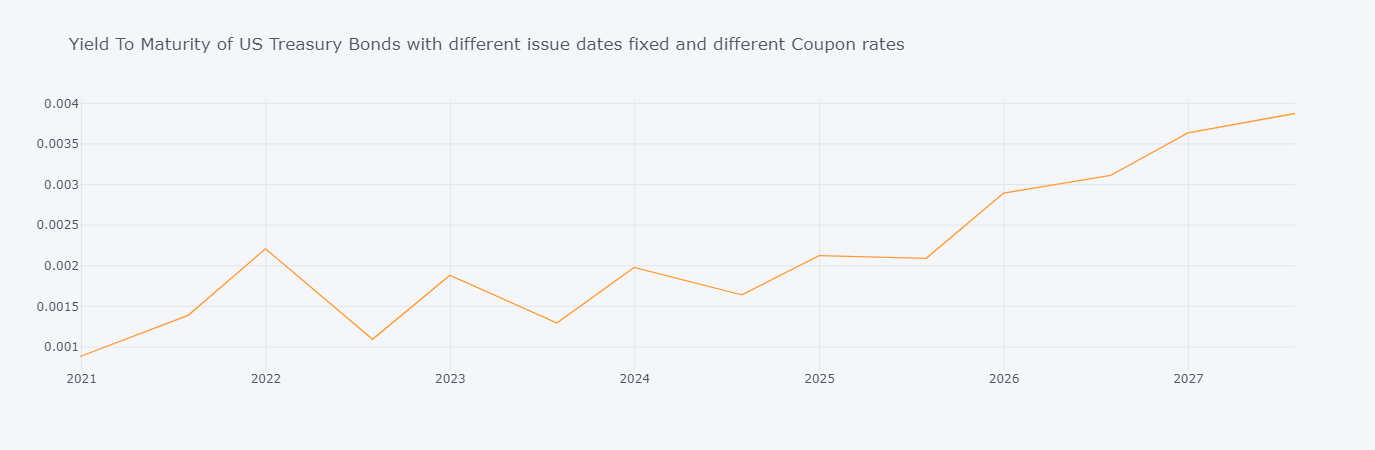

In [22]:
off_on_df["YTM implied by 2020-07-31 Price"].iplot(
    title="Yield To Maturity of US Treasury Bonds with different issue dates fixed and different Coupon rates")

This vertical zig-zaging is an unexpected pattern. The reason for which it is unexpected is that an economic agent ought to be able to exploit [arbitrage](https://www.investopedia.com/terms/a/arbitrage.asp) opportunities brought up by such price discrapencies with other securities (*e.g.*: [Swaps](https://www.investopedia.com/articles/optioninvestor/07/swaps.asp)). Let's thus verify if the YTM proposed by our graph above are correct:

In [27]:
for i in range(len(off_on_df)):
    _fv=off_on_df.iloc[i]["RV"]
    _c=off_on_df.iloc[i]["RV"] * off_on_df.iloc[i]["C"] / 100
    _f_acf=0.5
    _p=off_on_df.iloc[i]["Price on 2020-07-31"]
    _m=(round(2*((datetime.strptime(off_on_df.iloc[i]["RDL"], '%Y-%m-%d') - datetime.strptime(from_date, '%Y-%m-%d')).days)/360)) / 2
    _ytm, err = YTM_Solver(fv=_fv, c=_c, m=_m, f_acf=_f_acf, error=True, p=_p)
    zero = (_fv/((1+(_f_acf*_ytm))**(_m/_f_acf))) - _p + sum([
        (_f_acf * _c)/((1+(_f_acf*_ytm))**i) for i in range(1, int(_m/_f_acf)+1)])
    print(f"Years left to Maturity: {_m}, YTM from function: {_ytm}, err from function: {err}, check: {zero}.")

Years left to Maturity: 0.5, YTM from function: 0.0008823891336079769, err from function: 0.0, check: 0.0.
Years left to Maturity: 1.0, YTM from function: 0.001389229366311189, err from function: -1.3322676295501878e-14, check: -1.3322676295501878e-14.
Years left to Maturity: 1.5, YTM from function: 0.0022083810604940305, err from function: 9.325873406851315e-15, check: 9.325873406851315e-15.
Years left to Maturity: 2.0, YTM from function: 0.0010932860674747608, err from function: -4.0084602304091277e-13, check: -4.0084602304091277e-13.
Years left to Maturity: 2.5, YTM from function: 0.0018830173997592785, err from function: 2.7533531010703882e-14, check: 2.7533531010703882e-14.
Years left to Maturity: 3.0, YTM from function: 0.0012947271629833368, err from function: -7.478462293875054e-13, check: -7.478462293875054e-13.
Years left to Maturity: 3.5, YTM from function: 0.001980168093318993, err from function: -4.065157099830685e-10, check: -4.065157099830685e-10.
Years left to Maturity:

In [ ]:
def OMTB_ZCB_2020_01_30(typ, datatype):
    return omtb_zcb_2020_01_30[typ][omtb_zcb_2020_01_30[typ]['Datatype'] == datatype]['Value'].values[0]

Spot_Rate_Last(f=0.5, fv=100, m=5, c=0.25, p=100.2031, sr=[
    YTM_Solver(
        fv=OMTB_ZCB_2020_01_30(typ='fixed', datatype='RV'),
        m=OMTB_ZCB_2020_01_30(typ='fixed', datatype='TERM'),
        f_acf=0.5, error=False, c=0,
        p=ytm_df.iloc[i]["Price at issue"])])

##### Using the Python 'Refinitiv Data Platform' Library and its Search Functionality

Unfortunitally, there is no way to search for the identifiers per issued Bond as per the Navigator (either like [this](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=30%2F09%2F25+ISIN%3Aand(*91282CA*)&prev=99_31%2F09%2F25+ISIN%3Aand(*91282CA*)&nav_category=13) or like [this](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+Note+2020+31%2F08%2F25&prev=99_US+Treasury+Note+2020+28%2F08%2F25&nav_category=13)) programatically. This is - however - possible with the [rdp.search](https://developers.refinitiv.com/en/article-catalog/article/building-search-into-your-application-workflow) functionality that can fetch for us the ISIN or RIC of interest simply from the perital search of "UST 31-Aug-2020" for example:

In [182]:
import refinitiv.dataplatform as rdp
rdp_key = open("eikon.txt", "r")  # The key is placed in a text file so that it may be used in this code without showing it itself:
rdp.open_desktop_session(str(rdp_key.read()))
rdp_key.close()  # It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:

In [183]:
test = rdp.get_search_metadata(view = rdp.SearchViews.GovCorpInstruments)

In [184]:
test2 = pandas.DataFrame(data=[i[0] for i in test.index],
                         columns=["A"])
test2

,A
0,AccrualDate
1,AccruedInterest
2,ActiveEstimatesExist
3,AdtLocalCurrencyValue
4,AdtLocalCurrencyValueName
...,...
1120,WorstStandardYield
1121,WorstYearsToRedem
1122,YieldCurveBenchmarkRIC
1123,YieldTypeDescription


In [198]:
', '.join([str(elem) for elem in [i for i in test2[test2['A'].str.contains("Date")]["A"].map(str)]])

'AccrualDate, AnnounceDate, AssetStatusEffDate, AuctionDate, BondListingDate, CallRefundingDate, EconometricAverageLifeDate, EconometricPrinEndDate, EconometricPrinStartDate, EconometricRedemDate, FaceOutstandingDate, FactorDate, FirstAnnouncementDate, FirstCouponDate, FitchsRatingDate, GuarantorEffectiveDate, GuarantorEndDate, InsertDateTime, IssueDate, LastChangeDate, LastCouponDate, LatestCallStartDate, LatestPutStartDate, LatestRatingEffectiveDate, MaturityAverageLifeDate, MaturityDate, MaturityPrinEndDate, MaturityPrinStartDate, MaturityRedemDate, MiFIDThresholdEffectiveDate, MiFIDThresholdEndDate, MoodysCreditWatchDate, MoodysRatingDate, NextCallDate, NextPayDate, NextPutDate, NextRateResetDate, NextSinkDate, PricingRedemDate, PricingTradeDate, RankDateTime, RecordDate, RecordDateCode, RecordDateDescription, RecordDateVal, SettleDate, SPCreditWatchDate, SPLatestRatingEffectiveDate, SPRatingDate, TradeDate, UnderwriterEffectiveDate, UnderwriterSetupDate, WorstAverageLifeDate, Wors

In [199]:
# Determine the organization ID using Search.
tese_search = rdp.search(
    view=rdp.SearchViews.GovCorpInstruments, top=5,
    query="United States of America (Government) - UST 08/31/25",  # also tried ' United States 31-Aug-2020 ' and ' United States of America (Government) Plain Vanilla Fixed Coupon Bond TRACE Eligible GOVT 31-Jul-2025 '.
    filter = "MaturityCorpOTRPoint eq 'TSY5Y'",
    select=str("IssueDate, AssetStatusEffDate, AccrualDate, MaturityPrinStartDate, MaturityRedemDate, " +
#                "MaturityCorpConvexity, MaturityCorpOTRSpread, " +
#                "MaturityCorpOTRTerm, MaturityStandardOTRTerm, " +
#                "MaturityDiscountRate, DebtTypeDescription, " +
#                "MaturityRedemPrice, IssuerName, DocumentTitle, RIC, " +
               "BusinessEntity, CouponRate, ISIN, IssuerTicker, " +
#                "DebtTypeDescription, MaturityCorpYield, " +
#                "OriginalYieldMaturity, MaturityStandardOTRSpread, " +
               "MaturityCorpOTRPoint"))  # Found all these via ' rdp.get_search_metadata(view = rdp.SearchViews.GovCorpInstruments) '

In [200]:
pandas.set_option('display.max_columns', None)
tese_search

,RecordDate,FirstAnnouncementDate,FitchsRatingDate,LastChangeDate,PricingTradeDate,RecordDateCode,TradeDate,FirstCouponDate,RecordDateDescription,AssetStatusEffDate,FaceOutstandingDate,MaturityPrinStartDate,WorstAverageLifeDate,AnnounceDate,MiFIDThresholdEffectiveDate,AuctionDate,AccrualDate,MoodysRatingDate,SPRatingDate,WorstPrinStartDate,SettleDate,BondListingDate,RecordDateVal,IssueDate,MiFIDThresholdEndDate,InsertDateTime,MaturityRedemDate,LastCouponDate,PricingRedemDate,WorstRedemDate,MaturityPrinEndDate,WorstPrinEndDate,MaturityAverageLifeDate,NextPayDate,LatestRatingEffectiveDate,MaturityDate
0,4th Business Day(s) Prior to Payment Date,2018-08-23T00:00:00.000Z,2018-08-31T00:00:00.000Z,2021-07-01T00:00:00.000Z,2021-07-07T00:00:00.000Z,BDP,2021-07-07T00:00:00.000Z,2019-02-28T00:00:00.000Z,Nth Business Day(s) Prior to Payment Date,2018-08-31T00:00:00.000Z,2018-09-30T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2018-08-23T00:00:00.000Z,<NA>,2018-08-29T00:00:00.000Z,2018-08-31T00:00:00.000Z,2020-06-19T00:00:00.000Z,2018-08-31T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-07-08T00:00:00.000Z,2018-08-23T00:00:00.000Z,4,2018-08-31T00:00:00.000Z,<NA>,2021-05-30T23:41:48.000Z,2025-09-02T00:00:00.000Z,2025-02-28T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-08-31T00:00:00.000Z,1970-01-01T05:36:50.000Z,2025-08-31T00:00:00.000Z
1,4th Business Day(s) Prior to Payment Date,2020-08-20T00:00:00.000Z,2020-09-14T00:00:00.000Z,2021-07-06T00:00:00.000Z,2021-07-07T00:00:00.000Z,BDP,2021-07-07T00:00:00.000Z,2021-02-28T00:00:00.000Z,Nth Business Day(s) Prior to Payment Date,2020-08-31T00:00:00.000Z,2020-09-30T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2020-08-20T00:00:00.000Z,<NA>,2020-08-26T00:00:00.000Z,2020-08-31T00:00:00.000Z,2020-08-27T00:00:00.000Z,2020-08-31T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-07-08T00:00:00.000Z,2020-08-20T00:00:00.000Z,4,2020-08-31T00:00:00.000Z,<NA>,2021-05-30T16:16:19.000Z,2025-09-02T00:00:00.000Z,2025-02-28T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-08-31T00:00:00.000Z,1970-01-01T05:36:40.000Z,2025-08-31T00:00:00.000Z
2,<NA>,2018-08-23T00:00:00.000Z,<NA>,2020-10-08T00:00:00.000Z,2021-07-07T00:00:00.000Z,<NA>,2021-07-07T00:00:00.000Z,<NA>,<NA>,2018-08-31T00:00:00.000Z,<NA>,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2018-08-23T00:00:00.000Z,1534-01-01T00:00:00.000Z,2018-08-29T00:00:00.000Z,<NA>,2018-08-31T00:00:00.000Z,2018-08-31T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-07-08T00:00:00.000Z,<NA>,<NA>,2018-08-31T00:00:00.000Z,9999-12-31T00:00:00.000Z,2021-05-30T17:58:49.000Z,2025-09-02T00:00:00.000Z,<NA>,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,<NA>,<NA>,2025-08-31T00:00:00.000Z
3,<NA>,2018-08-23T00:00:00.000Z,<NA>,2020-10-27T00:00:00.000Z,2021-07-07T00:00:00.000Z,<NA>,2021-07-07T00:00:00.000Z,<NA>,<NA>,2018-08-31T00:00:00.000Z,<NA>,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2018-08-23T00:00:00.000Z,<NA>,2018-08-29T00:00:00.000Z,<NA>,2018-08-31T00:00:00.000Z,2018-08-31T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-07-08T00:00:00.000Z,<NA>,<NA>,2018-08-31T00:00:00.000Z,<NA>,2021-05-31T00:23:00.000Z,2025-09-02T00:00:00.000Z,<NA>,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,<NA>,<NA>,2025-08-31T00:00:00.000Z
4,<NA>,2020-08-20T00:00:00.000Z,<NA>,2020-12-25T00:00:00.000Z,2021-07-07T00:00:00.000Z,<NA>,2021-07-07T00:00:00.000Z,<NA>,<NA>,2020-08-31T00:00:00.000Z,<NA>,2025-09-02T00:00:00.000Z,2025-09-02T00:00:00.000Z,2020-08-20T00:00:00.000Z,1597-01-01T00:00:00.000Z,2020-08-26T00:00:00.000Z,<NA>,2020-08-31T00:00:00.000Z,2020-08-31T00:00:00.000Z,2025-09-02T00:00:00.000Z,2021-07-08T00:00:00.000Z,<NA>,<NA>,2020-08-

In [59]:
for i in tese_search["DocumentTitle"]:
    print(i)

United States of America (Government), Plain Vanilla Fixed Coupon Bond, TRACE Eligible GOVT 2.75 31-Aug-2025
United States of America (Government), Plain Vanilla Fixed Coupon Bond, TRACE Eligible GOVT .25 31-Aug-2025
United States of America (Government), Bond, TRACE Eligible STRIPP 0 31-Aug-2025
United States of America (Government), Bond, TRACE Eligible STRIPI 0 31-Aug-2025
United States of America (Government), Bond, TRACE Eligible STRIPP 0 31-Aug-2025


We can clearly see - in that graph - the inverse relationship between YTM and Price. Also, we can note that when the price of the bond goes above its FV (of \$100), the YTM does not go negative; that's because of the added revenue from coupons. Was this coupon to be non Coupon paying (i.e.: a Zero-Coupon-Bond), then its YTM would be negative when its price would go above its FV. Often - as a matter of fact - we do extrapelate Zero-Coupon Equivalent YTMs, this way all YTMs are comparable to each other. This is called '[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(finance))'.

## Bootstrapping: Zero-Coupon Equivalent Bond's Yield To Maturity

To go from a Coupon-Paying YTM (CPYTM) to a Zero-Coupon Equivalent Yield To Maturity ($YTM_{ZCE}$), all we have to do is equate $NPV_{f_{\text{acf}}, t}$ and $NPV_{ZCE,f_{\text{acf}}, t}$ where 
$
NPV_{ZCE,f_{\text{acf}}, t} = 
    \begin{Bmatrix}
         \frac{FV_t}{\left(1 + f_{\text{acf}} \text{ } YTM_{ZCE,t}\right)^\frac{m}{f_{\text{acf}}}} & \text{if } m \geq f_{\text{acf}} \\
         \\
         \frac{FV_t}{\left(1 + \text{ } m \text{ } YTM_{ZCE,t}\right)} & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$. Remember that we are using realised prices, so we already have $NPV_{f_{\text{acf}}, t}$ values such that:

$$ \begin{array}{ll}
NPV_{f_{\text{acf}}, t} &= NPV_{ZCE,f_{\text{acf}}, t} \\
&= 
    \begin{Bmatrix}
         \frac{FV_t}{\left(1 + f_{\text{acf}} \text{ } YTM_{ZCE,t}\right)^\frac{m}{f_{\text{acf}}}} & \text{if } m \geq f_{\text{acf}} \\
         \\
         \frac{FV_t}{\left(1 + \text{ } m \text{ } YTM_{ZCE,t}\right)} & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
\end{array} $$

Therefore:

$$ \begin{array}{ll}
{YTM}_{ZCE,t} &= 
    \begin{Bmatrix}
         \frac{ \sqrt[\frac{m}{f_{\text{acf}}}]{ \frac{FV_t}{NPV_{f_{\text{acf}}, t}} } - 1 }{ f_{\text{acf}} } & \text{if } m \geq f_{\text{acf}} \\
         \\
         \frac{ \frac{FV_t}{NPV_{f_{\text{acf}}, t}} - 1 }{ m } & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
\end{array} $$

Let's code this up:

In [16]:
def Bootstrapping_YTM_from_CPB_to_ZCE(fv, m, p, f_acf):
    """Bootstrapping_YTM_from_CPB_to_ZCE(fv, m, p, f_acf) Version 1.0
    This Python function calculates the bootstrapped yield to maturity for a coupon paying bond, giving its zero-coupon equivalent bond's yield.

    Dependencies
    ----------

    Python library 'pandas' version 1.2.4.

    Parameters
    ----------

    fv: int or float
        Face Value (also known as (a.k.a.) Redemption Value) of the bond.
        This has to be in the same currency and p.

    m: int or float
        Maturity (a.k.a.: Term) of the Bond in years - if any.
        If it is less than a year, express it in a fraction (e.g.: 6 months as 1/2).

    p: int or float
        Realised price of the Bond.
        This has to be in the same currency as fv.

    f_acf: int or float
          Annual compound frequency (such that if we compound cash flows annually, f_acf=1; and if we compound cash flows bi-annually (i.e.: twice a year / every 6 months), f_acf=0.5).
          Coupons are paid at a fixed 'annual Coupon payment frequency' (f_acPf). Usually, the following are true:
          - f_acPf = 0.5 , i.e.: Coupon payments are made every 6 months (i.e.: semi-annually)
          - f_acf is set to the f_acPf such that f_acPf = f_acf
          - Thus usually f_acPf = f_acpf = 0.5.

    Returns
    -------

    float: the ytm as per a zero-coupon equivalent bond.
    """

    if m >= f_acf:  # Net Preset Values (NPVs) - and by extension Yields - of Bonds are valued with equations that depend on the relative value of their maturities and annual compound frequency.
        return (((fv/p)**(f_acf/m))-1)/f_acf
    elif m < f_acf:
        return ((fv/p)-1)/m
    else:
        return "fv, m, p and f_acf must be numbers - either integers or floating point numbers."

### Bootstrapping T-Note Example: Five Year T-Note with Semi-Annual Compounding a 5 Year T-Note

In [17]:
Bootstrapping_YTM_from_CPB_to_ZCE(fv=100, m=5, f_acf=0.5, p=100.1016)  # Using our old value of 100.1016 from the US FYTN maturing on 2020_07_31's price as of 2020-07-30.

-0.00020308653253198194

## Risk-free rate of a Five Year T-Note

If an investor buys a Five Year T-Note for 900 U.S.D. at the start of a 5 year period, it will mature with a Face Value of \\$ 100, and the investor would have made $1000 - 900 = \$100$ in profit. Over that 5 year, that's a straight-line / arithmetic return rate of $\frac{1000 - 900}{900} = 0.\dot{1}$ (note that the [dot on top of $1$ in $0.\dot{1}$ is the standard notation of a recurring decimal](https://en.wikipedia.org/wiki/Repeating_decimal)) , *i.e.*: approximately 11.11%, since:

In [8]:
(1000 - 900)/900

0.1111111111111111

That - itself - is a straight-line / arithmetic daily return rate of $\frac{0.\dot{1}}{365*5} \approx 0.000060882800608828 \approx 0.0061\%$ since:

In [3]:
((1000 - 900)/900)/(365*5)

6.0882800608828e-05

(S)He **theoretically** gets that return every day (theoretically since it doesn't realise until the bond matures, *i.e.*: until the end of the Bond).

**But** investors are in the habit of re-investing their returns to benefit from [compounding](https://www.investopedia.com/terms/c/compounding.asp). This way we are not looking at straight-line / arithmetic interests, but [geometric](https://en.wikipedia.org/wiki/Exponential_growth) interest. The geometric daily interest of our investor is

$$\sqrt[365*5]{1 + \frac{1000 - 900}{900}} - 1 = \left( 1 + \frac{1000 - 900}{900} \right)^{\frac{1}{365*5}} - 1 \approx 0.00005773345591331136 \approx 0.0058 \%$$

since:

In [4]:
((1 + ((1000-900)/900)))**(1/(365*5)) - 1

5.773345591331136e-05

(note that the ${\frac{1}{n}}^{th}$ exponent of a value is its $n^{th}$ root; this is a concept that is imperative to comprehend to understand the coding we go through below) meaning that (s)he gets approximately $\text{\$}900 * 0.0000577... = \text{\$}0.051960$ the first day, then $(\text{\$}900 + \text{\$}0.051960...) * 0.0000577... \approx \text{\$} 0.051963$ the next day, and so on.



Following the same logic, it is easy to calculate the risk-free rate ($r_f$) on any frequency. The compounding $r_f$ of our 5 Year T-Note for any number of periods in a year (say, daily, *i.e.*: $d$) with a yield ${YTM}_{\text{FYTN}, t}$ is such that:

$$\mathbf{r_f = \sqrt[d]{1 + {YTM}_{\text{FYTN}, t}} - 1}$$

It is this simple because YTMs are annualised. *E.g.*: If ${YTM}_{\text{FYTN}, t} \approx 0.002295515059055049$ : $$r_f \approx \sqrt[365]{1 + 0.002295515059055049} - 1 \approx 0.000006281894770587826 \approx 0.00063 \%$$ since:

In [11]:
(1.002295515059055049**(1/365))-1

6.281894770587826e-06

This is the **YTM implied daily risk-free rate** ($r_f$) of our bond. A similar 'weekly' - 7 day - or 'monthly' - 30 day - rate can be made by letting $d$ be the number of weeks or months for the year in question.

Why would one use 30 days (as per our example)? Because the 1-, 2-, and 3-month rates are equivalent to the 30-, 60-, and 90-day dates respectively, reported on [the Board's Commercial Paper Web page](www.federalreserve.gov/releases/cp/). This is as per reference (see more [here](https://fred.stlouisfed.org/series/DGS1MO#0) and [here](https://www.federalreserve.gov/releases/h15/current/h15.pdf)) with that said, one ought to use the exact number of days to maturity.

Note - however - that we only looked at Zero-Coupon Bonds. If $m > 1$, then Coupons usually have to be taken into account.

We may now code a Python function to go through this method:

In [14]:
# The below are needed to plot graphs of all kinds
import plotly
import plotly.express
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks
cufflinks.go_offline()
# cufflinks.set_config_file(offline = True, world_readable = True)

for i,j in zip(["plotly", "cufflinks"], [plotly, cufflinks]):
    print("The " + str(i) + " library imported in this code is version: " + j.__version__)

### Create a function to compute the risk-free rate of return for any Zero-Coupon Bond's Yield To Maturity gathered from [Datastream](https://www.refinitiv.com/en/products/datastream-macroeconomic-analysis):

remember, our formula is: $${r_{f,t}} = \sqrt[d]{1 + {YTM}_{\text{FYTN}, t}} - 1$$ where $t \in \mathbb{Z}$ and $ 1 \le t \ge T$. We define the (time) vector

$$
\mathbf{r\_f} = 
\left[ \begin{matrix}
    r_{{f},1} \\
    r_{{f},2} \\
    \vdots\\
    r_{{f},T}
\end{matrix} \right]
$$

This Python function will return the Bond's YTM Implied Risk Free Interest Rate, thus its name 'B_YTM_Implied_r_f':

In [17]:
def B_YTM_Implied_r_f(ytm, d):
    """ B_YTM_Implied_r_f Version 1.0: This Python function returns the Bond (B) Yield To Maturity (YTM) Implied Risk Free Interest Rate, thus its name 'B_YTM_Implied_r_f'.

    Parameters
    ----------
    
    ytm: Datastream pandas dataframe
        The Yield To Maturity of the Zero-Coupon Bond in question.
    It requiers the DSWS library from Refinitiv.
    E.g.: ytm = ds.get_data(tickers = 'TRUS1MT', fields = "X", start = '1950-01-01', freq = 'D')/100

    d (int): The number of time periods (e.g.: days) until the bond matures
    N.B.: The 1-, 2-, and 3-month rates are equivalent to 30-, 60-, and 90-day dates respectively, as reported on the Board's Commercial Paper Web page.
    E.g.: d = 365*5
    """

    # Rename the columns of 'ytm' correctly:
    instrument_name = ytm.columns[0][0]
    arrays = [[instrument_name], ['YTM']]
    tuples = list(zip(*arrays))
    ytm.columns = pandas.MultiIndex.from_tuples(tuples,
                                                names=['Instrument', 'Field'])

    # Calculate the r_f
    r_f = ((ytm + 1)**(1/d))-1

    # Rename the columns of r_f correctly:
    instrument_name = ytm.columns[0][0]
    arrays = [[instrument_name], ['YTM_Implied_r_f']]
    tuples = list(zip(*arrays))
    r_f.columns = pandas.MultiIndex.from_tuples(tuples,
                                                names=['Instrument', 'Field'])

    # return a list including r_f 0th and ytm 1st.
    return(r_f, ytm)

Let's test the Python function with One-Month U.S. T.Bill:

In [18]:
test1m = ZCB_YTM_Implied_r_f(
    ytm=ds.get_data(tickers='TRUS1MT', fields="X",
                    start='1950-01-01', end='2020-07-22', freq='D')/100,
    d=30)

In [19]:
test1m[0].dropna()

Instrument,TRUS1MT
Field,YTM_Implied_r_f
Dates,
2001-07-31,0.001183
2001-08-01,0.001180
2001-08-02,0.001180
2001-08-03,0.001173
2001-08-06,0.001173
...,...
2020-07-16,0.000038
2020-07-17,0.000037


In [20]:
test1m[0].dropna().loc["2019-12-31"]*100

Instrument  Field          
TRUS1MT     YTM_Implied_r_f    0.048918
Name: 2019-12-31, dtype: float64

In [21]:
test1m[1].dropna()

Instrument,TRUS1MT
Field,YTM
Dates,
2001-07-31,0.03610
2001-08-01,0.03600
2001-08-02,0.03600
2001-08-03,0.03580
2001-08-06,0.03580
...,...
2020-07-16,0.00114
2020-07-17,0.00112


## Note

It took me a long time to search through several Datastream US Treasury Bonds to find the ones in the graph called "Non-Comparable Yield To Maturity of US Treasury Note issued at end of Jully 2020 with fixed and DIFFEENT Coupon rates"; bellow is a sinipet of code showing some of my results:

In [31]:
# test_df = pandas.DataFrame()
_fields = ["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]
_instruments = ["253Y75", "600AJH", "601JP7", "602RDQ", "603R1R", "603TEX",
                "604DPZ", "604FVT", "605RTD", "247PV6", "606F1L", "247WM3",
                "603ZVZ", "604ECR", "249HFX", "604JH0", "250A11", "610Z60",
                "611UEW", "608WM5", "612G7Y", "609MWJ", "613AQ3", "610JML",
                "613V2R", "247PV5", "628D4U", "625Q7N", "626J83", "609MWK",
                "627U5T", "612M36", "628GA1", "6146YF", "250A47", "247WM4",
                "250A48", "250A49", "250A49", "625Q70", "628GAL", "614X79",
                "606PUA", "21852Z",
                "796H4V", "833HLC", "235FFA"]
for i in ["796H4V", "833HLC", "235FFA"]:
    _test_df = ds.get_data(tickers=i, kind=0, fields=_fields)
    test_df = test_df.append(pandas.DataFrame(
        data=list(_test_df['Value'].values), index=_fields).T)

In [32]:
test_df.sort_values(by=["RDL"])

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL
0,253Y75,UTD.STS OF AMERICA 2020 ZERO 05/05/20,2020-03-10,0.25,100,0,ZERO,2020-05-05
0,600AJH,UTD.STS OF AMERICA 2020 ZERO 12/05/20,2020-03-17,0.25,100,0,ZERO,2020-05-12
0,601JP7,UTD.STS OF AMERICA 2020 ZERO 19/05/20,2020-03-24,0.25,100,0,ZERO,2020-05-19
0,602RDQ,UTD.STS OF AMERICA 2020 ZERO 26/05/20,2020-03-31,0.25,100,0,ZERO,2020-05-26
0,603R1R,UTD.STS OF AMERICA 2020 ZERO 02/06/20,2020-04-07,0.25,100,0,ZERO,2020-06-02
0,603TEX,UTD.STS OF AMERICA 2020 ZERO 09/06/20,2020-04-01,0.25,100,0,ZERO,2020-06-09
0,604DPZ,UTD.STS OF AMERICA 2020 ZERO 16/06/20,2020-04-08,0.25,100,0,ZERO,2020-06-16
0,604FVT,UTD.STS OF AMERICA 2020 ZERO 23/06/20,2020-04-15,0.25,100,0,ZERO,2020-06-23
0,605RTD,UTD.STS OF AMERICA 2020 ZERO 30/06/20,2020-05-05,0.25,100,0,ZERO,2020-06-30
0,247PV6,UTD.STS OF AMERICA 2020 ZERO 02/07/20,2020-01-02,0.5,100,0,ZERO,2020-07-02


## References

### Datastream
- [REFINITIV INDICES GOVERNMENT BOND INDICES](https://www.refinitiv.com/content/dam/marketing/en_us/documents/methodology/government-bond-indices-user-guide.pdf)
- https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+2020+ZERO+DESC%3Aand(*%2F07%2F20*)&prev=99_US+2020+ZERO+DESC%3Aand(*%2F05%2F20*)&nav_category=13
- https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=UTD.STS+OF+AMERICA+2020+ZERO+DESC%3Aand(*%2F08%2F21*)&prev=99_UTD.STS+OF+AMERICA+2020+ZERO+DESC%3Aand(*%2F07%2F21*)&nav_category=13
- https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=UTD.STS+OF+AMERICA+2020+ZERO+29%2F06%2F21&prev=99_UTD.STS+OF+AMERICA+2020+ZERO+29%2F12%2F20&nav_category=13
- https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+2020+DESC%3Aand(*%2F01%2F22*)&prev=99_US+Treasury+2020+DESC%3Aand(*%2F07%2F20*)&nav_category=13
- https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+2020+DESC%3Aand(*%2F01%2F21*)&prev=99_US+2020+ZERO+DESC%3Aand(*%2F07%2F20*)&nav_category=13


### Yield Optimisation
- [scipy.optimize.newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

### Miscellaneous
- [Bootstrapped spot rates with missing bonds](https://www.reddit.com/r/askfinance/comments/ojkphx/bootstrapped_spot_rates_with_missing_bonds/)
- [Bootstrapping the Zero Curve and Forward Rates - Straight Line Interpolation](https://financetrainingcourse.com/education/2016/10/bootstrapping-zero-curve-forward-rates/)
- [cubic spline interpolation](https://www.google.com/search?q=cubic+spline+interpolation&rlz=1C1GCEA_en__890__890&oq=cubic+spline+interpolation&aqs=chrome..69i57j0l9.540j0j4&sourceid=chrome&ie=UTF-8)
- [Building Search into your Application Workflow](https://developers.refinitiv.com/en/article-catalog/article/building-search-into-your-application-workflow)
- [What is Bootstrapping?](https://www.educba.com/bootstrapping-examples/)
- [How to calculate Yield To Maturity with Python](https://medium.com/@gennadii.turutin/how-to-calculate-yield-to-maturity-with-python-65a9a34d56f3)